In [1]:
import os
import cv2
import numpy as np
import torch
from utils import *
import matplotlib.pyplot as plt

In [2]:
R_source, T_source = look_at_view_transform(400, 0, 0)
R_dest, T_dest = look_at_view_transform(400, 0, 15)

In [3]:
mkdir_if_missing('./images')

In [4]:
mesh_folder = '/home/tungi/dataset/mface/m--20180227--0000--6795937--GHS/tracked_mesh/E061_Lips_Puffed/'
tex_folder = '/home/tungi/dataset/mface/m--20180227--0000--6795937--GHS/unwrapped_uv_1024/E061_Lips_Puffed/average/'

frame_numbers = []
for p in Path(tex_folder).glob('*.png'):
    n = os.path.split(str(p))[-1].split('.')[0]
    frame_numbers.append(n)
frame_numbers.sort()

resolution = 1024

obj, verts, tex = load_mf_obj(mesh_folder, tex_folder, frame_numbers[0], tex_resolution=resolution)
mesh = create_p3d_mesh(obj, verts, tex)


In [5]:
z_far = 800

rgbd_source = mesh2rgbd(mesh, R_source, T_source, resolution=resolution, zfar=z_far, return_cam=False)

In [7]:
cloud = rgbd2cloud(rgbd_source, R_source, T_source, zfar=z_far)

In [8]:
rgb_dest = cloud2rgb(cloud, R_dest, T_dest)

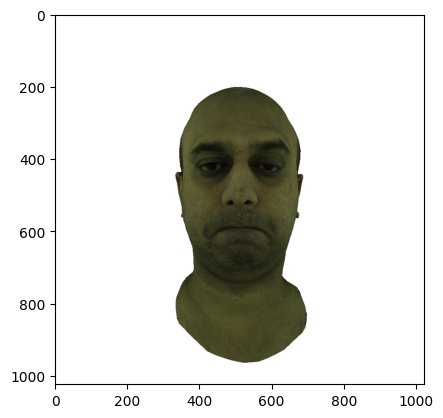

In [10]:
plt.imshow(rgbd_source[0][..., :3])

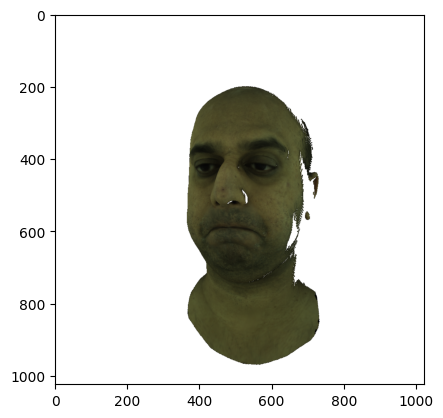

In [9]:
plt.imshow(rgb_dest[0])

In [10]:
novel_view_gt = mesh2rgbd(mesh, R_dest, T_dest, resolution=resolution, zfar=z_far, return_cam=False)
rgb_gt = novel_view_gt[0][..., :3]

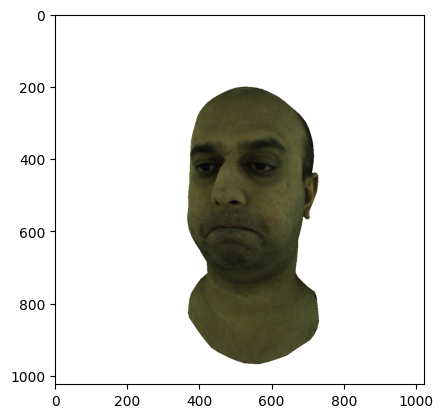

In [11]:
plt.imshow(rgb_gt)

In [42]:
xor_result = np.isclose(rgb_dest[0], rgb_gt, atol=0.1)  # each channel could have different results
mask = np.logical_and(xor_result[..., 2], np.logical_and(xor_result[..., 0], xor_result[..., 1]))

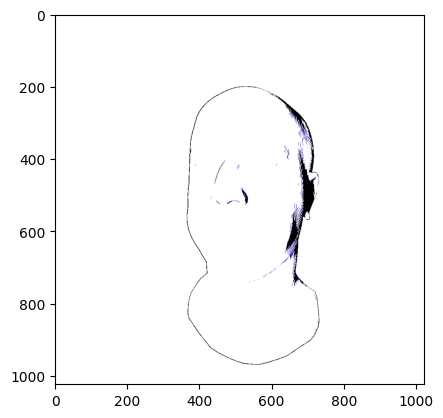

In [33]:
plt.imshow(xor_result.astype(np.float64))

In [25]:
xor_result.max()

True

In [106]:
novel_view_to_save = normalize_image_value(rgb_dest[0], convert_to='255')
novel_view_gt_to_save = normalize_image_value(rgb_gt, convert_to='255')
cv2.imwrite('./images/1.png', novel_view_to_save[..., ::-1])
cv2.imwrite('./images/1_gt.png', novel_view_gt_to_save[..., ::-1])

# compute difference
ref1 = normalize_image_value(rgb_dest[0], convert_to='255')
ref2 = normalize_image_value(rgb_gt, convert_to='255')
difference = cv2.subtract(ref1, ref2)
difference = difference - difference.min()
difference = difference / difference.max()
difference *= 255
Conv_hsv_Gray = cv2.cvtColor(difference.astype(np.float32), cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(Conv_hsv_Gray.astype(np.uint8), 0, 255, cv2.THRESH_BINARY_INV |cv2.THRESH_OTSU)

cv2.imwrite('./images/1_mask.png', 255-mask) 


True

In [90]:
difference.min()

0.0

In [63]:
plt.imshow(difference)

Error in callback <function _draw_all_if_interactive at 0x7f97d8422a60> (for post_execute):


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 640x480 with 1 Axes>